In [2]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

import figurefirst as fifi

np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7

In [8]:
df1 = pd.read_hdf('../../../data/WindyMASigned.h5')
df2 = pd.read_hdf('../../../data/NotWindyMASigned.h5')
df3 = pd.read_hdf('../../../data/ForestMASigned.h5')

q='odor>4.5'
dfdist1=df1.query(q)
dfdist2=df2.query(q)
dfdist3=df3.query(q)

dataframes=[dfdist1,dfdist2,dfdist3]
data=[df1,df2,df3]

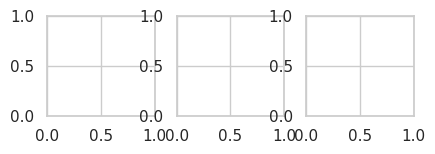

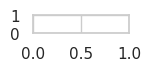

In [7]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/time_spent.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [22]:
ax = layout.axes[('ts', 'ax1')]
ax.grid(False)


hist, xedges, yedges = np.histogram2d(df1.distance_from_source_a*df1.xsign,
                                      df1.nearest_from_streakline*df1.ysign, 
                                      bins=20, normed=False)

dt=df1.master_time[1]-df1.master_time[0]
counts_dt = hist * dt
counts_dt = np.nan_to_num(counts_dt, nan=0.0, posinf=0.0, neginf=0.0)



ax.pcolormesh(xedges, yedges, counts_dt.T, 
                   cmap='Greys', norm=colors.LogNorm(),rasterized=True) 


ax.axhline(0, color = 'grey', alpha=0.5)
ax.axvline(0, color = 'grey', alpha=0.5)
ax.plot(0,0,marker='o',  c='#fd6549ff', markersize=7, alpha=0.8, rasterized=True)

ax.set_rasterization_zorder(-20)


mpl_functions.adjust_spines(ax,['left', 'bottom'],spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True, 
                            xticks=[0,50],
                            yticks=[-25,25], 
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['ts'], 'ts', cleartarget=True)
layout.write_svg('../../../Figure/time_spent.svg')

In [23]:
ax = layout.axes[('ts', 'ax2')]
ax.grid(False)

hist, xedges, yedges = np.histogram2d(df2.distance_from_source_a*df2.xsign,
                                      df2.nearest_from_streakline*df2.ysign, 
                                      bins=20, normed=False)

counts_dt = hist * dt
counts_dt = np.nan_to_num(counts_dt, nan=0.0, posinf=0.0, neginf=0.0)



pc = ax.pcolormesh(xedges, yedges, counts_dt.T, 
                   cmap='Greys', norm=colors.LogNorm(),rasterized=True) 

ax.set_ylim(-25,25)

ax.axhline(0, color = 'grey', alpha=0.5)
ax.axvline(0, color = 'grey', alpha=0.5)
ax.plot(0,0,marker='o',  c='#fd6549ff', markersize=7, alpha=0.8, rasterized=True)

ax.set_rasterization_zorder(-20)


mpl_functions.adjust_spines(ax,['bottom'],spine_locations={'bottom': 5}, 
                            smart_bounds=True, 
                            xticks=[0,50],
                            
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['ts'], 'ts', cleartarget=True)
layout.write_svg('../../../Figure/time_spent.svg')

In [24]:
ax = layout.axes[('ts', 'ax3')]
ax.grid(False)


hist, xedges, yedges = np.histogram2d(df3.distance_from_source_a*df3.xsign,
                                      df3.nearest_from_streakline*df3.ysign, 
                                      bins=20, normed=False)

counts_dt = hist * dt
counts_dt = np.nan_to_num(counts_dt, nan=0.0, posinf=0.0, neginf=0.0)


pc = ax.pcolormesh(xedges, yedges, counts_dt.T, 
                   cmap='Greys', norm=colors.LogNorm(),rasterized=True) 

ax.set_ylim(-25,25)

ax.axhline(0, color = 'grey', alpha=0.5)
ax.axvline(0, color = 'grey', alpha=0.5)
ax.plot(0,0,marker='o',  c='#fd6549ff', markersize=7, alpha=0.8, rasterized=True)

ax.set_rasterization_zorder(-20)


mpl_functions.adjust_spines(ax,['bottom'],spine_locations={'bottom': 5}, 
                            smart_bounds=True, 
                            xticks=[0,50],
                           
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['ts'], 'ts', cleartarget=True)
layout.write_svg('../../../Figure/time_spent.svg')

### Colorbar

posx and posy should be finite values


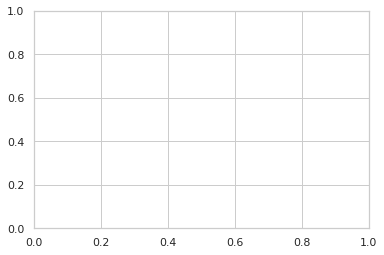

In [27]:
ax = layout.axes[('tscbar', 'cbar')]
# xtic=[0,400]
ax.grid(False)

hist, xedges, yedges = np.histogram2d(df1.distance_from_source_a*df1.xsign,
                                      df1.nearest_from_streakline*df1.ysign, 
                                      bins=20, normed=False)

dt=df1.master_time[1]-df1.master_time[0]
counts_dt = hist * dt
counts_dt = np.nan_to_num(counts_dt, nan=0.0, posinf=0.0, neginf=0.0)


ax.grid(False)  # Explicitly remove grid lines
pc = ax.pcolormesh(xedges, yedges, counts_dt.T, 
                   cmap='Greys', norm=colors.LogNorm(), rasterized=True)  # Transpose counts_dt to align with coordinate system


# cbar = plt.(pc, ax=ax, orientation='horizontal')
cbar = plt.colorbar(pc, cax=ax,orientation='horizontal');
cbar.outline.set_visible(False)
cbar.ax.xaxis.set_minor_locator(ticker.NullLocator())
# cbar.ax.tick_params(width=0.3)  
cbar.ax.tick_params(width=0.3, length=2)
cbar.ax.tick_params(labelsize=1)  


ax.set_rasterization_zorder(-20)
ax.set_xlabel("Time Spent, s",rotation=0, labelpad=0)

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['tscbar'], 'tscbar', cleartarget=True)
layout.write_svg('../../../Figure/time_spent.svg')